<a href="https://colab.research.google.com/github/Naveengowtham2003/Accenture_training/blob/main/Multimodal_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the required packages for this project


In [120]:
import kagglehub
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Downloading the data from the kaggle

In [6]:
data_path = kagglehub.dataset_download("mragpavank/heart-diseaseuci")

In [20]:
downloaded_file = os.path.join(data_path, "heart.csv")
downloaded_file

'/root/.cache/kagglehub/datasets/mragpavank/heart-diseaseuci/versions/1/heart.csv'

# Converting the downloaded csv file to dataframe and storing it to a variable named df

In [21]:
df = pd.read_csv(downloaded_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Performing EDA

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [25]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [43]:
df.shape

(303, 14)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<ipython-input-45-3286ff6ed1a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


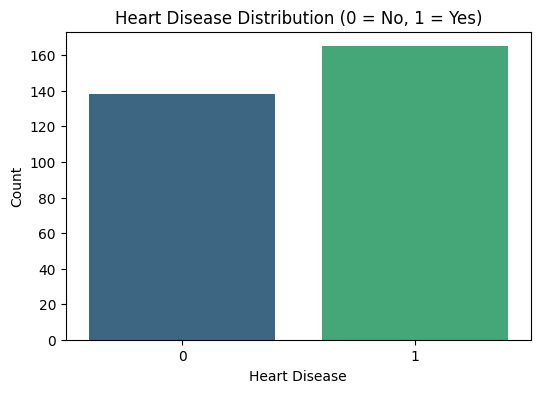

,count
target,
1,165
0,138


In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()
df['target'].value_counts()

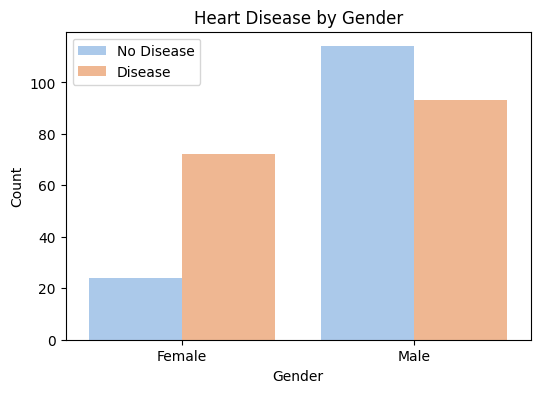

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df, palette='pastel')
plt.xticks([0, 1], ["Female", "Male"])
plt.title("Heart Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

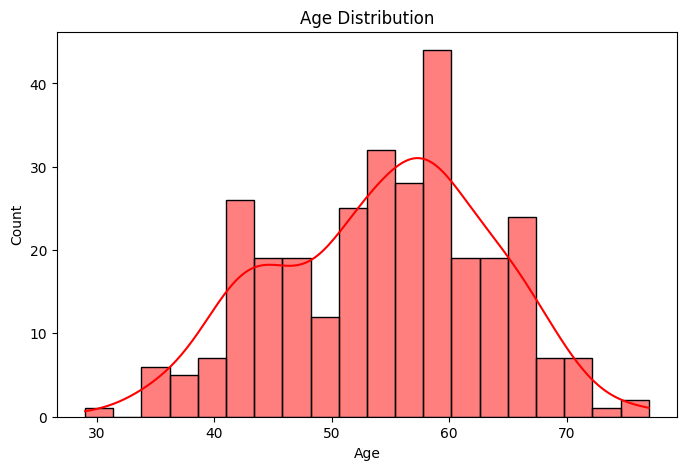

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


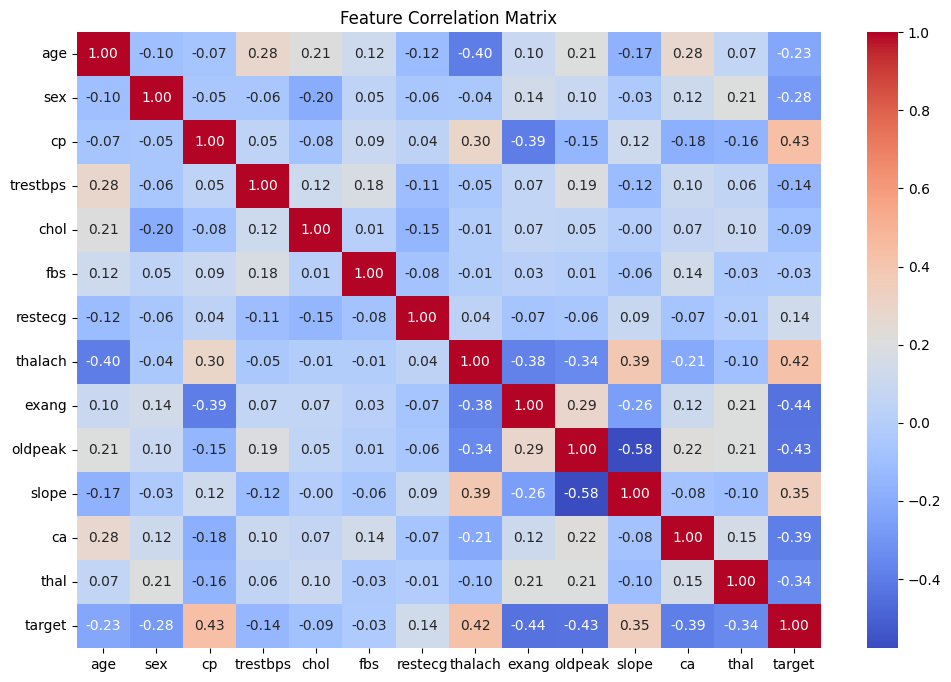

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


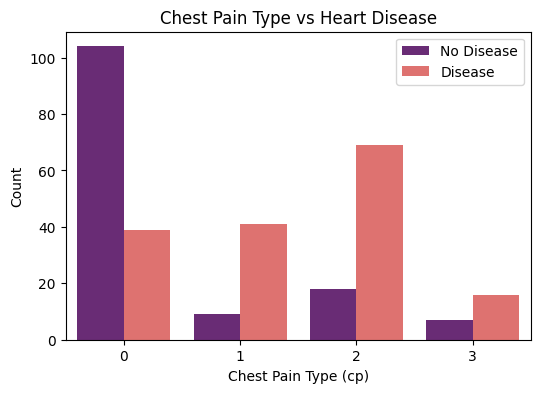

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=df, palette='magma')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()


<ipython-input-36-564717b286b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='viridis')


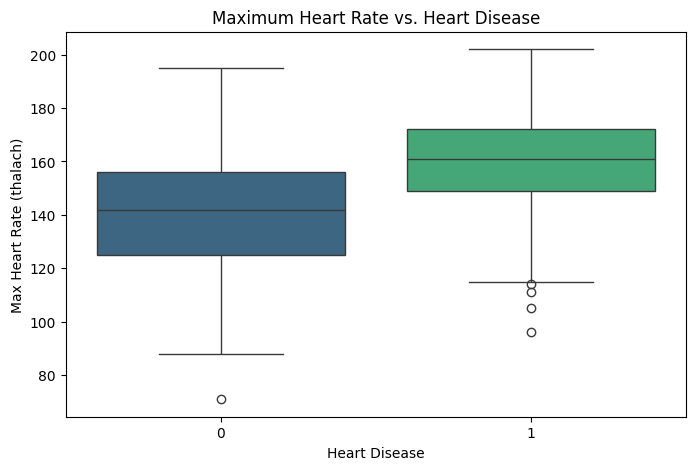

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='thalach', data=df, palette='viridis')
plt.title("Maximum Heart Rate vs. Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()


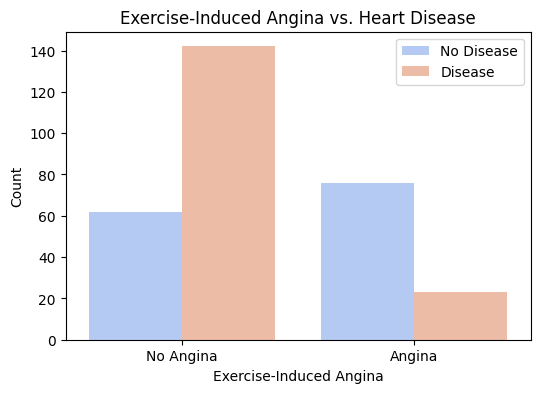

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='exang', hue='target', data=df, palette='coolwarm')
plt.xticks([0, 1], ["No Angina", "Angina"])
plt.title("Exercise-Induced Angina vs. Heart Disease")
plt.xlabel("Exercise-Induced Angina")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()


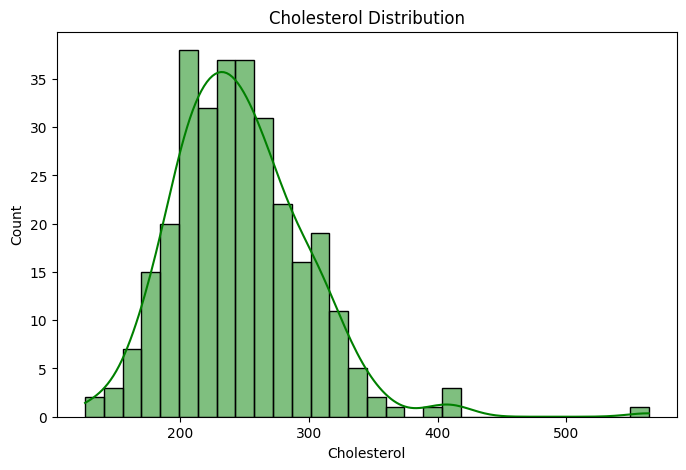

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=30, kde=True, color='green')
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()


<ipython-input-40-06cc23d4e63f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=df, palette='coolwarm')


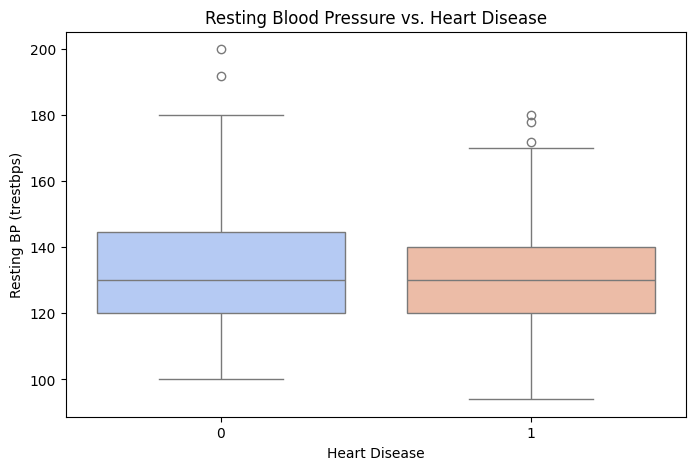

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='trestbps', data=df, palette='coolwarm')
plt.title("Resting Blood Pressure vs. Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Resting BP (trestbps)")
plt.show()


# Data Splitting

In [49]:
x = df.drop('target', axis=1)
y = df['target']

In [50]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


## Splitting the training and test data

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=52)

In [97]:
x.shape,X_train.shape,X_test.shape,Y_train,Y_test.shape

((303, 13),
 (242, 13),
 (61, 13),
 8      1
 79     1
 270    0
 27     1
 297    0
       ..
 86     1
 151    1
 13     1
 267    0
 156    1
 Name: target, Length: 242, dtype: int64,
 (61,))

In [98]:
Y_train

,target
8,1
79,1
270,0
27,1
297,0
...,...
86,1
151,1
13,1
267,0


# Building up a Logistic regression model

In [99]:
lr_model = LogisticRegression()

In [100]:
lr_model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

## Accuracy Score

In [101]:
xt_accuracy = lr_model.predict(X_train)
tda = accuracy_score(xt_accuracy,Y_train)
print("Accuracy score:",tda*100,"%")

Accuracy score: 85.12396694214877 %


In [102]:
yt_accuracy = lr_model.predict(X_test)
teda = accuracy_score(yt_accuracy,Y_test)
print("Accuracy score:",teda*100,"%")

Accuracy score: 85.24590163934425 %


The above value clearly shows that our model performs well in both training and test and no overfitting or underfitting

# Testing it by feading a realttime data

In [114]:
ip = (52,0,0,140,250,0,0,160,1,0.0,1,1,3)
np_array = np.array(ip)

## Reshaping the numpy array

In [115]:
array_reshaped = np_array.reshape(1,-1)

In [119]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    prediction = lr_model.predict(array_reshaped)


print("The Person has heart disease" if prediction[0] == 1 else "The person was fine")


The person was fine


### Sample datas

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
45,1,2,130,230,0,1,180,0,1.2,2,0,2,1
52,0,0,140,250,0,0,160,1,0.0,1,1,3,0
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,0,1,120,215,0,1,190,0,0.8,2,0,2,0
58,1,2,138,240,0,1,165,1,1.5,1,2,3,1
60,1,1,130,289,1,1,170,0,0.0,2,1,2,0
48,0,2,128,220,0,0,175,0,1.0,2,0,3,1
50,1,0,135,260,0,1,155,1,0.5,1,1,1,0
42,0,3,125,198,0,0,185,0,1.8,2,0,2,1
55,1,1,140,280,0,1,162,1,2.0,1,2,3,0
